In [30]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# https://drive.google.com/file/d/11KyKn11xLYw4CszHuCk6_jfYdDb6CKfJ/view?usp=sharing
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/drive


In [16]:
import pandas as pd
#path = '/content/gdrive/My Drive/Dataset/income.csv'
path = '/content/gdrive/My Drive/Dataset'
df = pd.read_csv(path+'/income.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [17]:
df2 = pd.read_csv('/content/gdrive/My Drive/Dataset/Mall_Customers.csv')
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
#changing column names
df2.rename(columns={'Gender':'g', 'Age':'a', 'Annual Income (k$)':'ai','Spending Score (1-100)':'score'}, inplace='True')
df2.head()

,CustomerID,g,a,ai,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
df2.isnull().values.any()

False

In [25]:
df2.isnull().sum()

CustomerID    0
g             0
a             0
ai            0
score         0
dtype: int64

In [27]:
df2.describe()

,CustomerID,a,ai,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


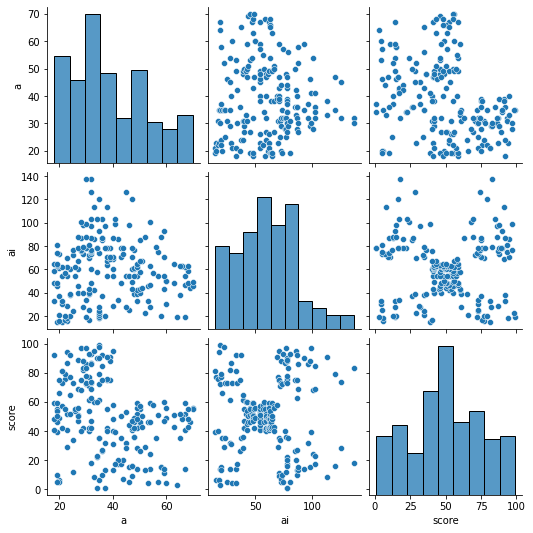

In [32]:
sn.pairplot(df2[['a','ai', 'score']])

In [57]:
#from sklearn.cluster import kmeans
#km = cluster.Kmeans
import sklearn.cluster as cluster
kms = cluster.KMeans(n_clusters=5)
kms2 = kms.fit(df2[['score','ai']])
kms2_predicted = kms2.fit_predict(df2[['score', 'ai']])
kms, kms2_predicted

(KMeans(n_clusters=5),
 array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
        3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
        1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
        0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
        0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
        0, 4], dtype=int32))

In [41]:
kms.cluster_centers_

array([[79.36363636, 25.72727273],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783]])

In [67]:
df3 = df2[df2.predict_cluster==0]
df4 = df2[df2.predict_cluster==1]
df5 = df2[df2.predict_cluster==2]
df6 = df2[df2.predict_cluster==3]
df7 = df2[df2.predict_cluster==4]
df3.value_counts().sum()#sum()#, df4, df5, df6, df7


35

In [58]:
#kon value kothai gelo
'''df2['income_clusters'] = kms.labels_
df2['predict_cluster'] = kms2_predicted
df2'''

,CustomerID,g,a,ai,score,income_clusters,predict_cluster
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,3,3
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,3,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,4,4
196,197,Female,45,126,28,0,0
197,198,Male,32,126,74,4,4
198,199,Male,32,137,18,0,0


In [44]:
df2['income_clusters'].value_counts()

1    81
2    39
3    35
4    23
0    22
Name: income_clusters, dtype: int64

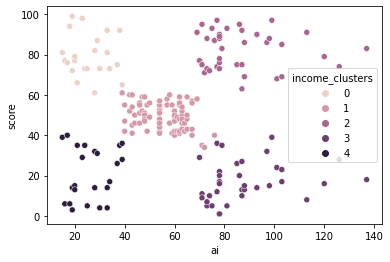

In [49]:
sn.scatterplot(x='ai', y='score', hue='income_clusters', data= df2)

In [73]:

from sklearn.cluster import KMeans
sse = []
k_rng = range(1, 10)
for k in k_rng:
  km = (n_clusters=k)
  km.fit(df2[['ai','score']])
  sse.append(km.inertia_)

print(sse)

TypeError: ignored